In [1]:
import imblearn
import numpy as np
import pandas as pd

# Loading data

In [2]:
names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

In [3]:
df = pd.read_csv('kddcup.csv', names=names)

In [4]:
df.drop('num_outbound_cmds', axis=1, inplace=True)
df.drop('is_host_login', axis=1, inplace=True)
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [5]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [6]:
df.shape

(145586, 40)

In [7]:
target_count = df.target.value_counts()

In [8]:
target_count

normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: target, dtype: int64

# Random under-sampling

In [9]:
count_class_normal, count_class_neptune, count_class_back, count_class_teardrop, count_class_satan, count_class_warezclient, count_class_ipsweep, count_class_smurf, count_class_portsweep, count_class_pod, count_class_nmap, count_class_guess_passwd, count_class_buffer_overflow, count_class_warezmaster, count_class_land, count_class_imap, count_class_rootkit, count_class_loadmodule, count_class_ftp_write, count_class_multihop, count_class_phf, count_class_perl, count_class_spy = df.target.value_counts()

In [10]:
# Divide by class
df_normal = df[df['target'] == 'normal.']
df_neptune = df[df['target'] == 'neptune.']
df_back = df[df['target'] == 'back.']
df_teardrop = df[df['target'] == 'teardrop.']
df_satan = df[df['target'] == 'satan.']
df_warezclient = df[df['target'] == 'warezclient.']
df_ipsweep = df[df['target'] == 'ipsweep.']
df_smurf = df[df['target'] == 'smurf.']
df_portsweep = df[df['target'] == 'portsweep.']
df_pod = df[df['target'] == 'pod.']
df_nmap = df[df['target'] == 'nmap.']
df_guess_passwd = df[df['target'] == 'guess_passwd.']
df_buffer_overflow = df[df['target'] == 'buffer_overflow.']
df_warezmaster = df[df['target'] == 'warezmaster.']
df_land = df[df['target'] == 'land.']
df_imap = df[df['target'] == 'imap.']
df_rootkit = df[df['target'] == 'rootkit.']
df_loadmodule = df[df['target'] == 'loadmodule.']
df_ftp_write = df[df['target'] == 'ftp_write.']
df_multihop = df[df['target'] == 'multihop.']
df_phf = df[df['target'] == 'phf.']
df_perl = df[df['target'] == 'perl.']
df_spy = df[df['target'] == 'spy.']

In [13]:
df_normal_under = df_normal.sample(count_class_neptune)

In [14]:
df_test_under = pd.concat([df_normal_under, df_neptune], axis=0)

In [15]:
print('Random under-sampling:')
print(df_test_under.target.value_counts())

Random under-sampling:
neptune.    51820
normal.     51820
Name: target, dtype: int64


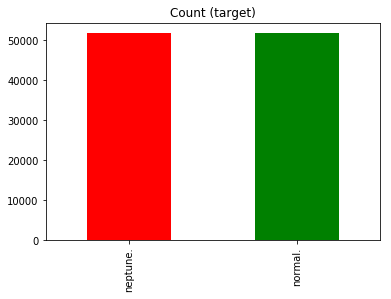

In [18]:
from matplotlib import pyplot as plt
my_colors = 'rgbkymc'
df_test_under.target.value_counts().plot(kind='bar', title='Count (target)',  color=my_colors);
plt.show()

# Random oversampling

In [23]:
df_neptune_over = df_neptune.sample(count_class_normal, replace=True)
df_test_over = pd.concat([df_normal, df_neptune_over], axis=0)

Random over-sampling:
normal.     87832
neptune.    87832
Name: target, dtype: int64


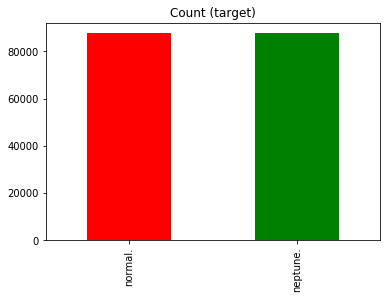

In [24]:
print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)', color=my_colors);
plt.show()

In [11]:
from collections import Counter
from imblearn.datasets import make_imbalance

In [12]:
df_test = pd.concat([df_loadmodule, df_rootkit], axis=0)

In [13]:
df_test['target'] = df_test['target'].astype('category')
cat_columns = df_test.select_dtypes(['category']).columns
df_test[cat_columns] = df_test[cat_columns].apply(lambda x: x.cat.codes)

In [14]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
4049,79,1,56,9,281,1301,0,0,0,2,...,10,1.0,0.0,1.0,0.30,0.0,0.0,0.0,0.1,0
86219,103,1,56,9,302,8876,0,0,0,2,...,1,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0
147604,0,1,19,9,0,5921,0,0,0,0,...,3,1.0,0.0,1.0,0.67,0.0,0.0,0.0,0.0,0
147605,0,1,19,9,0,5014,0,0,0,0,...,4,1.0,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0
147606,0,1,19,9,0,2072,0,0,0,1,...,5,1.0,0.0,1.0,0.40,0.0,0.0,0.0,0.0,0


In [47]:
data = df_test.values
Y = data[:,39]
X = data[:,0:39]

In [48]:
X.shape

(19, 39)

In [49]:
Y = Y.reshape(-1, 1)

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sScaler = StandardScaler()
rescaleX = sScaler.fit_transform(X)
pca = PCA(n_components=2)
rescaleX = pca.fit_transform(rescaleX)
rescaleX = np.append(rescaleX, Y, axis=1)

In [51]:
principalDf = pd.DataFrame(data = rescaleX, columns = ['principal component 1', 'principal component 2', 'target'])

In [52]:
principalDf.head()

,principal component 1,principal component 2,target
0,-0.074827,2.854827,0.0
1,1.291615,4.483403,0.0
2,-4.468923,1.584395,0.0
3,-4.376407,1.320772,0.0
4,-4.585688,2.086770,0.0


In [53]:
import matplotlib.pyplot as plt

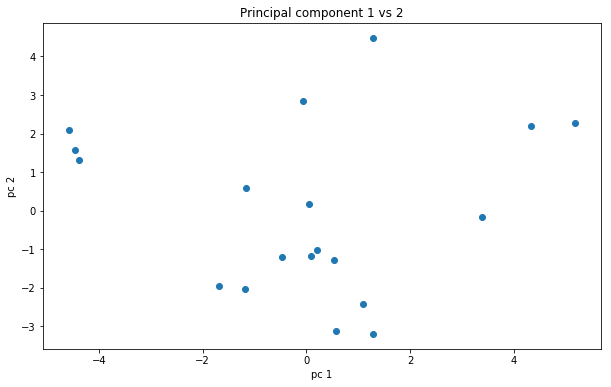

In [54]:
plt.clf()
plt.figure(figsize=(10,6))
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1])
plt.title('Principal component 1 vs 2')
plt.xlabel("pc 1")
plt.ylabel("pc 2")
plt.show()

In [55]:
data = principalDf.values

In [56]:
principalDf

,principal component 1,principal component 2,target
0,-0.074827,2.854827,0.0
1,1.291615,4.483403,0.0
2,-4.468923,1.584395,0.0
3,-4.376407,1.320772,0.0
4,-4.585688,2.086770,0.0
5,0.049923,0.170846,0.0
6,0.196737,-1.027830,0.0
7,0.089203,-1.163269,0.0
8,-0.471347,-1.202252,0.0
9,1.292547,-3.185521,1.0


In [57]:
label = data[:,2]

In [58]:
label

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])

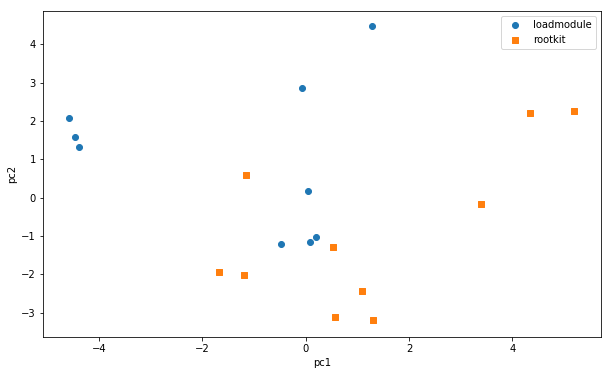

In [59]:
plt.clf()
plt.figure(figsize = (10, 6))
names = ['loadmodule', 'rootkit']
colors = ['#1F77B4', '#FF7F0E']
markers = ['o', 's']
#label = numpy array of target column
plt.xlabel('pc1')
plt.ylabel('pc2')
for i in range(len(names)):
    bucket = principalDf[principalDf['target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], c=colors[i], label=names[i], marker=markers[i]) 
plt.legend()
plt.show()

In [29]:
data = principalDf.values
Y = data[:,2]
X = data[:,0:2]

# Random under-sampling and over-sampling with imbalanced-learn


In [184]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, Y_rus, id_rus = rus.fit_sample(X, Y)

print('Removed indexes:', id_rus)

Removed indexes: [    0     1     2 ..., 47440 22420  1780]


In [185]:
Y_rus = Y_rus.reshape(-1, 1)
X_rus = np.append(X_rus, Y_rus, axis=1)
principalDf = pd.DataFrame(data = X_rus, columns = ['principal component 1', 'principal component 2', 'target'])

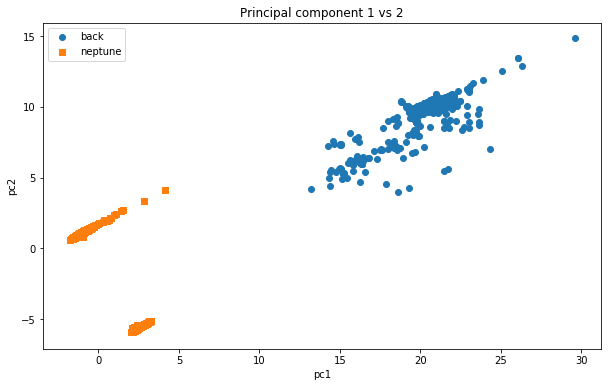

In [189]:
plt.clf()
plt.figure(figsize = (10, 6))
names = ['back', 'neptune']
colors = ['#1F77B4', '#FF7F0E']
markers = ['o', 's']
#label = numpy array of target column
plt.title('Principal component 1 vs 2')
plt.xlabel('pc1')
plt.ylabel('pc2')
for i in range(len(names)):
    bucket = principalDf[principalDf['target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], c=colors[i], label=names[i], marker=markers[i]) 
plt.legend()
plt.show()

In [188]:
principalDf.groupby('target').size()

target
0.0    968
1.0    968
dtype: int64

In [191]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, Y_ros = ros.fit_sample(X, Y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

50852 new random picked points


In [192]:
Y_ros = Y_ros.reshape(-1, 1)
X_ros = np.append(X_ros, Y_ros, axis=1)
principalDf = pd.DataFrame(data = X_ros, columns = ['principal component 1', 'principal component 2', 'target'])

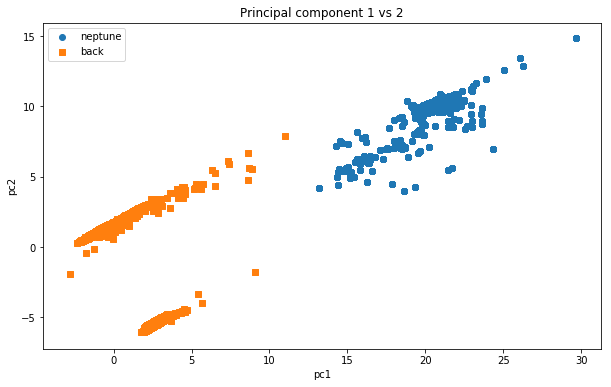

In [193]:
plt.clf()
plt.figure(figsize = (10, 6))
names = ['back', 'neptune']
colors = ['#1F77B4', '#FF7F0E']
markers = ['o', 's']
#label = numpy array of target column
plt.title('Principal component 1 vs 2')
plt.xlabel('pc1')
plt.ylabel('pc2')
for i in range(len(names)):
    bucket = principalDf[principalDf['target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], c=colors[i], label=names[i], marker=markers[i]) 
plt.legend()
plt.show()

In [194]:
principalDf.groupby('target').size()

target
0.0    51820
1.0    51820
dtype: int64

# Under-sampling: Tomek links

In [206]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, Y_tl, id_tl = tl.fit_sample(X, Y)

print('Removed indexes:', id_tl)

Removed indexes: [    0     1     2 ..., 52785 52786 52787]


In [208]:
Y_tl.shape

(52788,)

In [200]:
Y_tl = Y_tl.reshape(-1, 1)
X_tl = np.append(X_tl, Y_tl, axis=1)
principalDf = pd.DataFrame(data = X_tl, columns = ['principal component 1', 'principal component 2', 'target'])

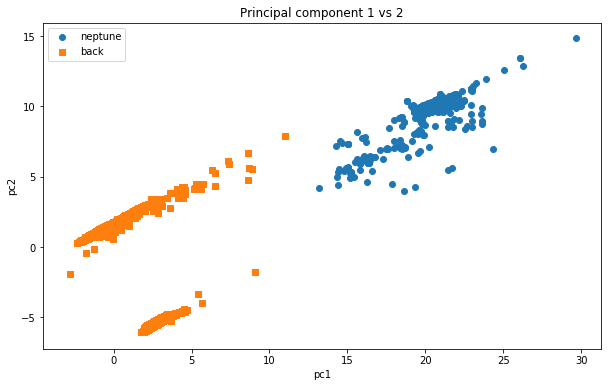

In [201]:
plt.clf()
plt.figure(figsize = (10, 6))
names = ['back', 'neptune']
colors = ['#1F77B4', '#FF7F0E']
markers = ['o', 's']
#label = numpy array of target column
plt.title('Principal component 1 vs 2')
plt.xlabel('pc1')
plt.ylabel('pc2')
for i in range(len(names)):
    bucket = principalDf[principalDf['target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], c=colors[i], label=names[i], marker=markers[i]) 
plt.legend()
plt.show()

In [24]:
principalDf.groupby('target').size()

target
0.0      968
1.0    51820
dtype: int64

# Under-sampling: Cluster Centroids

In [25]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={1: 968, 0: 500})
X_cc, Y_cc = cc.fit_sample(X, Y)

In [26]:
X_cc.shape

(1468, 2)

In [27]:
Y_cc.shape

(1468,)

In [231]:
X_cc

array([[ 29.62892884,  14.88659951],
       [ 25.04042331,  12.55011015],
       [ 23.27153278,  11.66499162],
       ..., 
       [ -1.54301872,   0.74372408],
       [ -1.18151537,   0.98291305],
       [  0.40780625,   1.99713311]])

In [28]:
Y_cc = Y_cc.reshape(-1, 1)
X_cc = np.append(X_cc, Y_cc, axis=1)
principalDf = pd.DataFrame(data = X_cc, columns = ['principal component 1', 'principal component 2', 'target'])

In [29]:
principalDf.shape

(1468, 3)

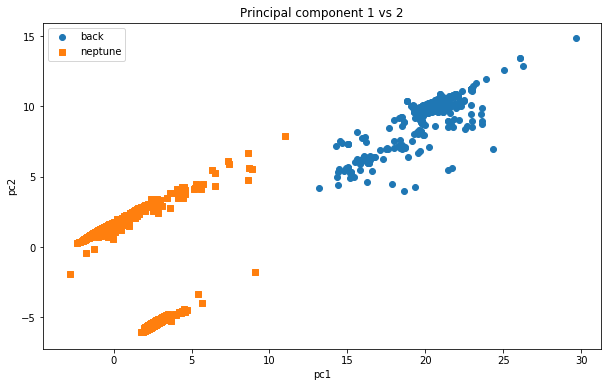

In [235]:
plt.clf()
plt.figure(figsize = (10, 6))
names = ['back', 'neptune']
colors = ['#1F77B4', '#FF7F0E']
markers = ['o', 's']
#label = numpy array of target column
plt.title('Principal component 1 vs 2')
plt.xlabel('pc1')
plt.ylabel('pc2')
for i in range(len(names)):
    bucket = principalDf[principalDf['target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], c=colors[i], label=names[i], marker=markers[i]) 
plt.legend()
plt.show()

In [236]:
principalDf.groupby('target').size()

target
0.0    968
1.0    968
dtype: int64

# Over-sampling: SMOTE

In [34]:
X

array([[-0.07482734,  2.85482723],
       [ 1.29161521,  4.48340331],
       [-4.46892273,  1.58439499],
       [-4.37640658,  1.32077222],
       [-4.58568763,  2.08676963],
       [ 0.04992336,  0.17084613],
       [ 0.19673664, -1.02782954],
       [ 0.08920261, -1.16326857],
       [-0.47134677, -1.2022523 ],
       [ 1.2925473 , -3.18552102],
       [ 1.08327325, -2.42904712],
       [ 5.18581676,  2.26747508],
       [ 0.53097045, -1.28411893],
       [ 4.33656509,  2.20424516],
       [-1.16086933,  0.58101802],
       [ 3.38361985, -0.15976077],
       [ 0.57277412, -3.12264072],
       [-1.19252029, -2.03042714],
       [-1.68246398, -1.94888564]])

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio={0: 50, 1: 50})
X_sm, Y_sm = smote.fit_sample(X, Y)

In [41]:
Y_sm.shape

(100,)

In [42]:
Y_sm = Y_sm.reshape(-1, 1)
X_sm = np.append(X_sm, Y_sm, axis=1)
principalDf = pd.DataFrame(data = X_sm, columns = ['principal component 1', 'principal component 2', 'target'])

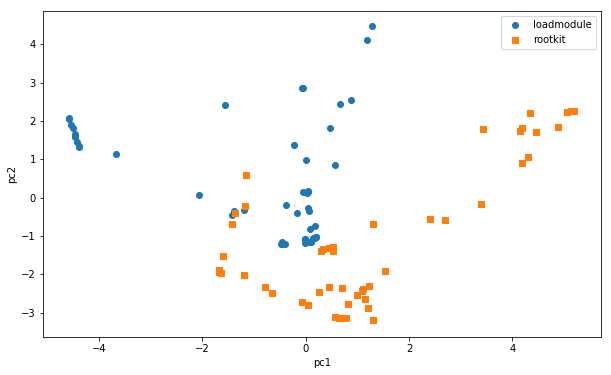

In [46]:
plt.clf()
plt.figure(figsize = (10, 6))
names = ['loadmodule', 'rootkit']
colors = ['#1F77B4', '#FF7F0E']
markers = ['o', 's']
#label = numpy array of target column
plt.xlabel('pc1')
plt.ylabel('pc2')
for i in range(len(names)):
    bucket = principalDf[principalDf['target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], c=colors[i], label=names[i], marker=markers[i]) 
plt.legend()
plt.show()